In [1]:
#CONNECT GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Memanggil dataset 
import pandas as pd
df = pd.read_csv("drive/MyDrive/Statistika Regresi Berganda.csv")
df.head()

,IQ,IPK,Tahun Lulus di Universitas
0,108,3.12,5.0
1,129,3.65,3.5
2,130,3.52,3.5
3,135,3.82,3.5
4,110,3.25,4.5


In [3]:
#Mengganti nama variabel
df.rename(columns={'IQ':'x1','IPK':'x2','Tahun Lulus di Universitas':'y'}, inplace=True)
df.head()


,x1,x2,y
0,108,3.12,5.0
1,129,3.65,3.5
2,130,3.52,3.5
3,135,3.82,3.5
4,110,3.25,4.5


Mengetahui hubungan linier antara vaiabel independen terhadap variabel dependen

Dengan Analisis korelasi

In [ ]:
#Mengitung nilai korelasi pearson antara IQ dan Tahun Lulus
from scipy.stats import pearsonr
# Convert dataframe into series
list1 = df['x1']
list2 = df['y']
corr, _ = pearsonr(list1, list2)
print(corr)

-0.8979754336325806


In [ ]:
#Mengitung nilai korelasi pearson antara IPK dan Tahun Lulus
from scipy.stats import pearsonr
# Convert dataframe into series
list1 = df['x2']
list2 = df['y']
corr, _ = pearsonr(list1, list2)
print(corr)

-0.9024977465716801


Dengan visualisasi berupa scater plot

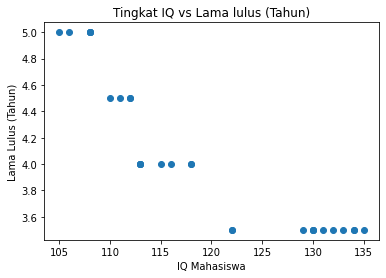

In [ ]:
# Untuk memunculkan Scatter Plot
import matplotlib.pyplot as plt
plt.scatter(df['x1'], df['y'])
plt.xlabel('IQ Mahasiswa')
plt.ylabel('Lama Lulus (Tahun)')
plt.title('Tingkat IQ vs Lama lulus (Tahun)')
plt.show()


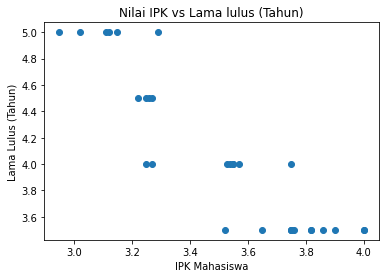

In [ ]:
# Untuk memunculkan Scatter Plot
import matplotlib.pyplot as plt
plt.scatter(df['x2'], df['y'])
plt.xlabel('IPK Mahasiswa')
plt.ylabel('Lama Lulus (Tahun)')
plt.title('Nilai IPK vs Lama lulus (Tahun)')
plt.show()


Membangun model Regresi Linier Berganda

In [ ]:
import numpy as np
import statsmodels.api as sm
x = df[['x1', 'x2']]
y = df['y']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     80.41
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           4.24e-12
Time:                        11:10:12   Log-Likelihood:                 3.2075
No. Observations:                  30   AIC:                           -0.4149
Df Residuals:                      27   BIC:                             3.789
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.5132      0.511     20.569      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
predict = model.predict(x)
print(predict.head())

0    4.721905
1    3.668495
2    3.765500
3    3.349915
4    4.546190
dtype: float64


In [ ]:
Residual = model.resid
print(Residual.head())

0    0.278095
1   -0.168495
2   -0.265500
3    0.150085
4   -0.046190
dtype: float64


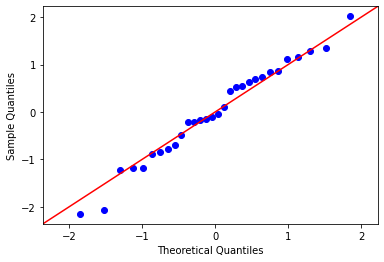

In [ ]:
# Melakukan Uji Asumsi Regresi
# Menggambar Plot QQ menggunakan package statmodels (asumsi residual berdistribusi normal)
import scipy.stats as stats
fig = sm.qqplot(Residual, stats.t, fit=True, line="45")
plt.show()

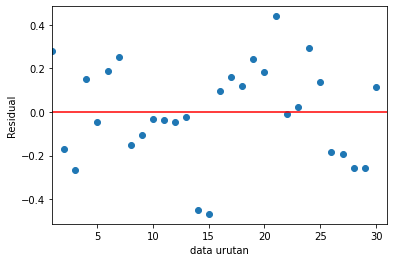

In [ ]:
# Plot memeriksa asumsi residual tidak terjadi autokorelasi
urutan_pengamatan = pd.Series(range(1,31))
plt.scatter(urutan_pengamatan, Residual);
plt.axhline(0, color='red')
plt.xlabel('data urutan');
plt.ylabel('Residual');
plt.xlim([1,31]);

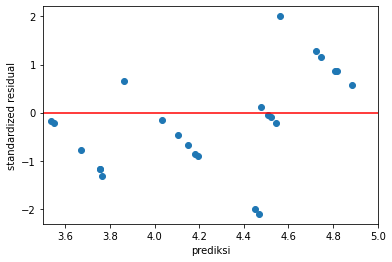

In [ ]:
# Plot memeriksa asumsi residual tidak terjadi heteroskedastisitas
influence = model.get_influence()
# menentukan standardized residualnya
std_residual = influence.resid_studentized_internal
plt.scatter(predict, std_residual);
plt.axhline(0, color='red')
plt.xlabel('prediksi')
plt.ylabel('standardized residual');
plt.xlim([3.5,5]);

In [ ]:
# Memeriksa asumsi residual  tidak terjadi autokorelasi
# Menggunakan pengujian Durbin-Watson
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(model.resid)
print(f"Durbin_Watson: {dw}")

Durbin_Watson: 1.261698118975068


In [ ]:
# Memeriksa asumsi residual tidak terjadi heteroskedastisitas
# Menggunakan pengujian Breush-Pagan
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

names = ['Langrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)

lzip(names, test)

[('Langrange multiplier statistic', 1.100357485547243),
 ('p-value', 0.5768466939870686),
 ('f-value', 0.5140141801912902),
 ('f p-value', 0.603825451199743)]

In [ ]:
# Memeriksa variabel independen memenuhi asumsi tidak terjadi multikolinieritas
# Menggunakan nilai VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
# Himpunan Variabel Independen
X = df[['x1', 'x2']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Menghitung VIF setiap variabel
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

  feature         VIF
0      x1  657.479364
1      x2  657.479364


In [ ]:
# Memanggil dataset 
import pandas as pd
df = pd.read_csv("drive/MyDrive/Data Peluang di Terima Pasca.csv")
df.head()

,Negara ke-,Toefl IBT,Nilai Ujian,Peluang di Terima
0,1,118,337,0.92
1,2,107,324,0.76
2,3,104,316,0.72
3,4,110,322,0.80
4,5,103,314,0.65


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

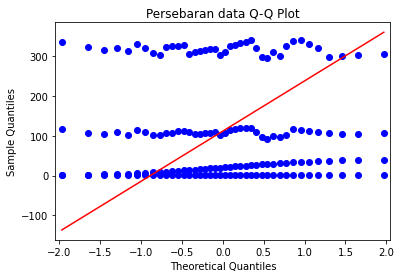

In [ ]:
sm.qqplot(df,line='s')
plt.title('Persebaran data Q-Q Plot')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


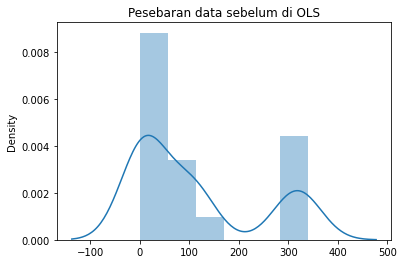

In [ ]:
plt.title('Pesebaran data sebelum di OLS')
sns.distplot(df)

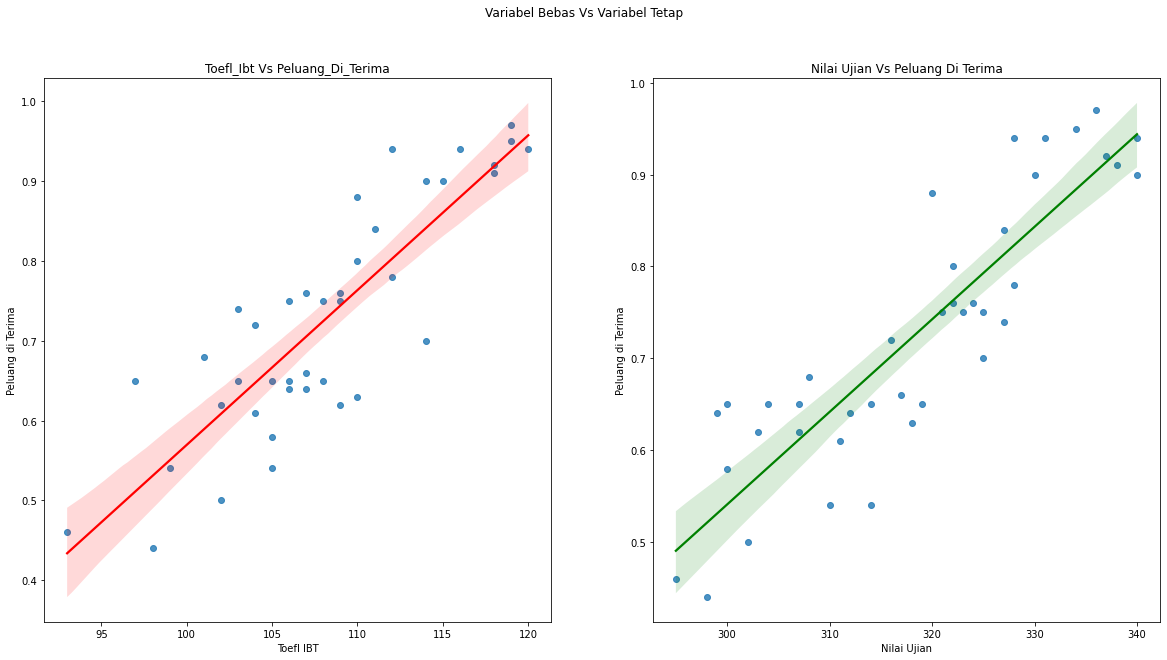

In [ ]:
fig,ax=plt.subplots(1,2,figsize=[20,10])
fig.suptitle('Variabel Bebas Vs Variabel Tetap')
ax[0].set_title('toefl_ibt VS peluang_di_terima'.title())
sns.regplot(data=df,x='Toefl IBT',y='Peluang di Terima',ax=ax[0],line_kws={'color':'r'})
ax[1].set_title('Nilai Ujian VS Peluang di Terima'.title())
sns.regplot(data=df,x='Nilai Ujian',y='Peluang di Terima',ax=ax[1],line_kws={'color':'g'})

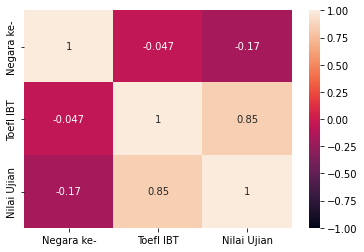

In [ ]:
sns.heatmap(df.drop('Peluang di Terima',axis=1).corr(),vmax=1,vmin=-1,annot=True)

In [ ]:
target=df['Peluang di Terima'].values.reshape(-1,1)
feature=df.drop('Peluang di Terima',axis=1).values
feature=sm.add_constant(feature)
model_data=sm.OLS(target,feature,missing='drop').fit()
model_data.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     58.62
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           6.24e-14
Time:                        11:57:05   Log-Likelihood:                 56.471
No. Observations:                  40   AIC:                            -104.9
Df Residuals:                      36   BIC:                            -98.19
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3311      0.274     -8.501      0.000      -2.887      -1.775
x1             0.0010      0.001      1.099      0.279      -0.001       0.003
x2             0.0079      0.003      2.610      0.013       0.002       0.014
x3             0.0069      0.002      4.468      0.000       0.004       0.010
==============================================================================
Omnibus:                        0.008   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.996   Jarque-Bera (JB):                0.129
Skew:                          -0.031   Prob(JB):                        0.938
Kurtosis:                       2.729   Cond. No.                     9.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

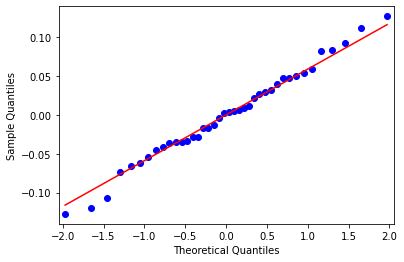

In [ ]:
sm.qqplot(model_data.resid,line='s')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


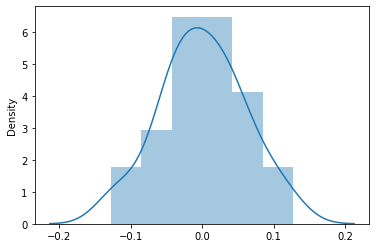

In [ ]:
sns.distplot(model_data.resid)

In [ ]:
# AutoKorelasi
print('nilai korelasi:',sm.stats.stattools.durbin_watson(model_data.resid))

nilai korelasi: 1.8228546353242265


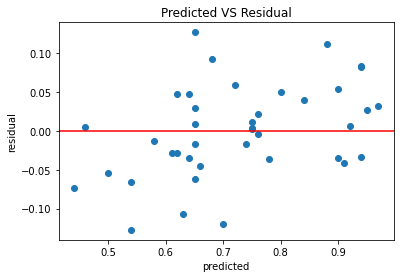

In [ ]:
# heteroskedastitas
homo_ask=plt.scatter(target,model_data.resid)
plt.xlabel('predicted')
plt.ylabel('residual')
plt.title('Predicted VS Residual')
plt.axhline(0,color='r')

In [ ]:
df_predict=pd.DataFrame({'score_ibt':df['Toefl IBT'],'nilai_ujian':df['Nilai Ujian']})
df_predict['actual']=df['Peluang di Terima']
df_predict['prediksi']=model_data.predict(feature)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

print('acurancy:',r2_score(df_predict['actual'],df_predict['prediksi']))
print('MSE:',mean_squared_error(df_predict['actual'],df_predict['prediksi']))

acurancy: 0.830075817414749
MSE: 0.0034774877763457486


In [ ]:
from statsmodels.compat import lzip
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
name=['Jarque-Bera',"Chi^2 two-tail prob",'skew','Kurtosis']
test=sms.jarque_bera(model_data.resid)
lzip(name,test)

[('Jarque-Bera', 0.12887123375514403),
 ('Chi^2 two-tail prob', 0.9375964777076476),
 ('skew', -0.03132216353480252),
 ('Kurtosis', 2.7290785565166855)]

REGRESSI LINIER DENGAN METODE KNN

In [5]:
df

,x1,x2,y
0,108,3.12,5.0
1,129,3.65,3.5
2,130,3.52,3.5
3,135,3.82,3.5
4,110,3.25,4.5
5,105,3.11,5.0
6,106,3.15,5.0
7,115,3.53,4.0
8,116,3.55,4.0
9,118,3.57,4.0


In [6]:
import numpy as np
x_train = np.array(df[['x1', 'x2']])
y_train = np.array(df['y'])

print("X training : ", x_train)
print("Y training : ", y_train)


X training :  [[108.     3.12]
 [129.     3.65]
 [130.     3.52]
 [135.     3.82]
 [110.     3.25]
 [105.     3.11]
 [106.     3.15]
 [115.     3.53]
 [116.     3.55]
 [118.     3.57]
 [130.     3.76]
 [130.     3.75]
 [112.     3.22]
 [113.     3.27]
 [113.     3.25]
 [133.     3.82]
 [134.     3.86]
 [131.     3.9 ]
 [132.     4.  ]
 [108.     3.02]
 [108.     3.29]
 [111.     3.26]
 [112.     3.27]
 [134.     4.  ]
 [118.     3.75]
 [113.     3.55]
 [113.     3.54]
 [122.     3.75]
 [122.     3.75]
 [108.     2.95]]
Y training :  [5.  3.5 3.5 3.5 4.5 5.  5.  4.  4.  4.  3.5 3.5 4.5 4.  4.  3.5 3.5 3.5
 3.5 5.  5.  4.5 4.5 3.5 4.  4.  4.  3.5 3.5 5. ]


In [7]:
from sklearn.neighbors import KNeighborsRegressor

k = 3
model = KNeighborsRegressor(n_neighbors=k)
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [8]:
x_new = np.array([[120, 3.72]])

In [9]:
y_pred = model.predict(x_new)
y_pred

array([3.66666667])